In [96]:

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch  #for plotting categorical map legend

import plotly.graph_objects as go   #for sankey diagram

import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np

from sklearn import metrics  #for confusion matrix
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd
import pandas as pd
import os
import urllib
import zipfile
import re
from descartes import PolygonPatch
from pysal.model import mgwr
import pysal.lib
import libpysal as ps
from libpysal.weights.contiguity import Queen
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# conda install mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
import warnings
#warnings.filterwarnings("ignore")

import pandas as pd               #for data
import seaborn as sns             #for plotting
import matplotlib.pyplot as plt   #for plotting
import statsmodels.api as sm      #for regression modelling
from scipy import stats           #for kendal tau
from sklearn import linear_model  #for cross-validation
from sklearn import model_selection
import numpy as np                #for mean and variance 
import numpy.ma as ma             #for masked array
import rasterio                   #for reading raster data
from rasterio.plot import show    #for plotting raster data

In [97]:
dfh = pd.read_csv("health3.csv")

In [98]:
dfur= pd.read_csv("unemployment_rate_3.csv")

In [99]:
shapefile = gpd.read_file("LAM/LAD_MAY_2021_UK_BFE_V2.shp")

In [100]:
shapefile = shapefile.set_geometry('geometry')

In [101]:
shapefile.shape

(374, 10)

<AxesSubplot: >

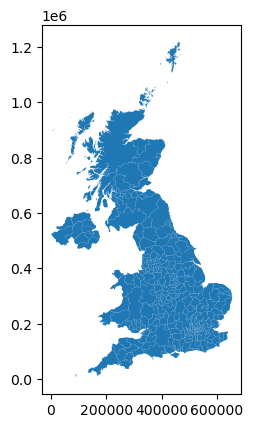

In [102]:
shapefile.plot()

<AxesSubplot: >

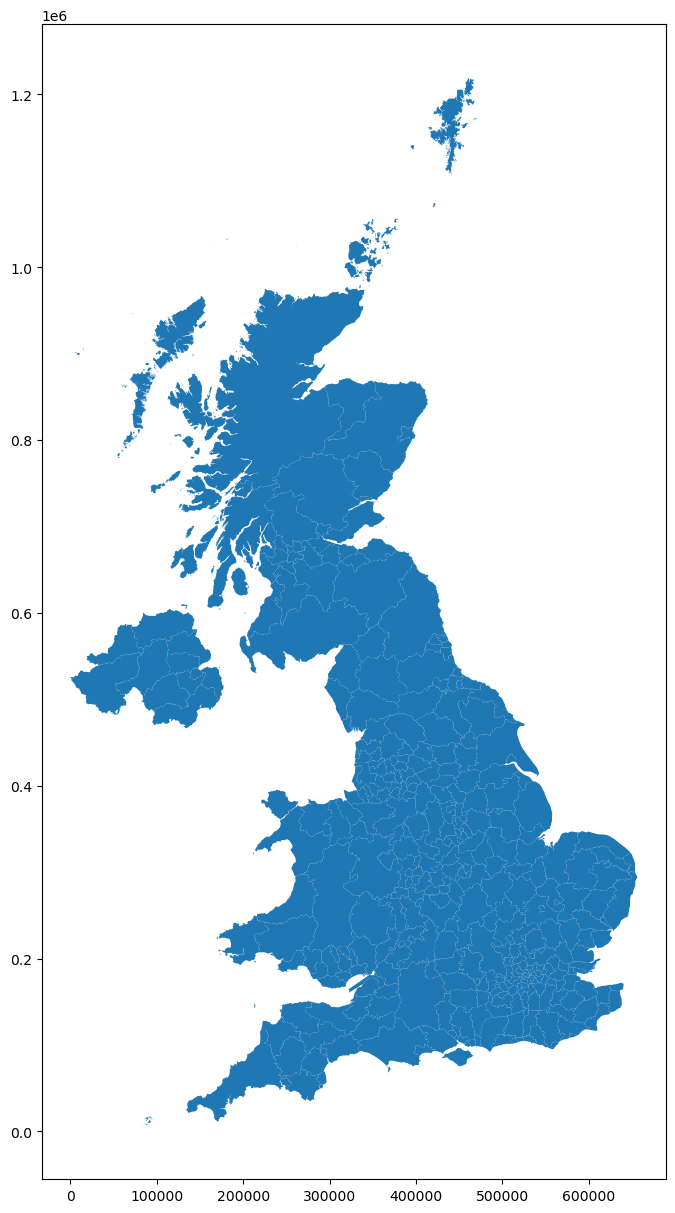

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
shapefile.plot(ax=ax)

In [104]:
dfur.head()

,Local Authority,Local Authority Code,Jan 2019 to Dec 2019,Apr 2019 to Mar 2020,Jul 2019 to Jun 2020,Oct 2019 to Sep 2020,Jan 2020 to Dec 2020,Apr 2020 to Mar 2021,Jul 2020 to Jun 2021,Oct 2020 to Sep 2021,Jan 2021 to Dec 2021,Apr 2021 to Mar 2022,Unnamed: 12
0,County Durham,E06000047,5.4,5.3,5.3,5.9,6.1,5.8,6.2,5.5,5.3,5.2,NaN
1,Darlington,E06000005,6.1,6.2,6.2,6.0,6.1,5.8,5.8,5.4,5.3,5.3,NaN
2,Hartlepool,E06000001,7.5,7.6,7.4,7.7,7.8,7.6,7.9,7.0,6.8,6.8,NaN
3,Middlesbrough,E06000002,7.6,6.9,7.1,7.5,7.3,7.0,7.5,7.5,7.3,7.9,NaN
4,Northumberland,E06000057,4.7,4.5,4.5,5.2,5.3,5.4,5.7,5.1,5.2,4.9,NaN


In [105]:
dfh.head()

,Local authority code (2020),Local authority name (2020),Region,Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,...,Epilepsy,Heart failure,High blood pressure (hypertension),Learning disabilities,Obesity,Osteoporosis,Peripheral arterial disease,Rheumatoid arthritis,"Schizophrenia, bipolar disorder & psychoses",Stroke and transient ischaemic attack
0,E07000032,Amber Valley,East Midlands,6.149,2.442,3.318,1.324,6.790,2.757,4.019,...,1.030,1.338,17.204,1.066,11.965,0.332,1.054,0.879,1.043,2.484
1,E07000032,Amber Valley,East Midlands,7.561,2.897,4.135,1.084,6.673,1.904,3.864,...,0.825,1.253,16.007,0.423,10.246,0.870,0.812,0.941,0.747,2.536
2,E07000032,Amber Valley,East Midlands,7.533,2.505,3.789,1.032,7.240,1.855,3.434,...,0.838,1.055,15.167,0.371,11.363,0.798,0.703,0.858,0.688,2.258
3,E07000032,Amber Valley,East Midlands,7.936,2.807,4.252,1.150,7.126,1.896,3.855,...,0.868,1.225,15.809,0.398,10.285,1.171,0.749,0.948,0.786,2.520
4,E07000032,Amber Valley,East Midlands,6.434,3.244,3.917,0.986,5.490,1.830,4.056,...,0.652,1.215,16.817,0.438,7.564,0.214,0.897,1.030,0.661,2.855


In [106]:
df_health=dfh.groupby("Local authority name (2020)").mean()

/var/folders/jb/nrfg9k8s6059zjcm7knb8kr40000gn/T/ipykernel_11252/4192273948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_health=dfh.groupby("Local authority name (2020)").mean()


In [107]:
df_health.head()

,Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,Dementia,Depression,Diabetes,Epilepsy,Heart failure,High blood pressure (hypertension),Learning disabilities,Obesity,Osteoporosis,Peripheral arterial disease,Rheumatoid arthritis,"Schizophrenia, bipolar disorder & psychoses",Stroke and transient ischaemic attack
Local authority name (2020),,,,,,,,,,,,,,,,,,,,
Adur,7.441750,3.005750,4.079375,1.090125,5.918625,2.367500,4.131875,0.935500,16.908875,8.720375,0.807125,1.098000,17.340375,0.524750,11.687875,1.281000,0.786250,1.002750,0.935625,2.098750
Allerdale,7.407000,2.784917,4.287917,1.401333,5.741833,2.449333,4.757417,1.094167,13.144917,8.325417,1.008417,1.296333,17.083917,0.559917,13.555083,0.947083,1.027750,0.971333,0.835167,2.658917
Amber Valley,7.279687,2.624375,3.798563,1.126937,6.155500,2.325000,3.885813,0.971375,13.793437,7.190437,0.856875,1.229500,16.089562,0.659000,12.386188,0.702750,0.888813,0.879625,0.818562,2.312625
Arun,7.211211,3.350316,4.620105,1.390158,4.732947,2.366105,4.392579,1.302842,12.221158,8.569421,0.830421,1.123158,18.347526,0.622526,10.531105,0.858000,0.768737,0.824368,1.012105,2.598737
Ashfield,6.817750,2.106375,3.415188,1.108562,5.413375,2.555687,3.856125,1.018125,13.051813,8.407750,1.051500,1.145000,15.460938,0.720500,14.900625,0.823750,0.674563,0.801813,0.747188,2.093750


In [108]:
dfur = dfur.rename(columns={'Local Authority': 'Local authority name (2020)'})

In [109]:
df = pd.merge(df_health, dfur, how= 'left' , on='Local authority name (2020)') 

In [110]:
df =df.drop([13,38,146,211,223,227,228,229,266,305,306,307,308,309,310,311,312,313])

In [111]:
df.drop('Unnamed: 12', axis=1, inplace=True)

In [112]:
df.shape

(296, 32)

In [113]:
df.head()

,Local authority name (2020),Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,Dementia,Depression,...,Jan 2019 to Dec 2019,Apr 2019 to Mar 2020,Jul 2019 to Jun 2020,Oct 2019 to Sep 2020,Jan 2020 to Dec 2020,Apr 2020 to Mar 2021,Jul 2020 to Jun 2021,Oct 2020 to Sep 2021,Jan 2021 to Dec 2021,Apr 2021 to Mar 2022
0,Adur,7.441750,3.005750,4.079375,1.090125,5.918625,2.367500,4.131875,0.935500,16.908875,...,3.0,2.9,3.2,3.6,3.9,4.4,4.4,3.9,3.8,3.4
1,Allerdale,7.407000,2.784917,4.287917,1.401333,5.741833,2.449333,4.757417,1.094167,13.144917,...,3.3,3.1,3.1,3.2,3.6,4.3,4.4,4.0,3.5,3.2
2,Amber Valley,7.279687,2.624375,3.798563,1.126937,6.155500,2.325000,3.885813,0.971375,13.793437,...,2.6,3.2,3.7,3.9,4.5,4.3,3.9,3.7,3.4,2.8
3,Arun,7.211211,3.350316,4.620105,1.390158,4.732947,2.366105,4.392579,1.302842,12.221158,...,3.3,3.3,3.9,4.2,4.1,4.4,3.9,3.4,3.8,3.9
4,Ashfield,6.817750,2.106375,3.415188,1.108562,5.413375,2.555687,3.856125,1.018125,13.051813,...,3.3,3.5,4.1,4.7,5.8,6.2,5.5,4.4,3.6,3.1


In [114]:
df.corr(method ='pearson')

/var/folders/jb/nrfg9k8s6059zjcm7knb8kr40000gn/T/ipykernel_11252/2355739806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,Dementia,Depression,Diabetes,...,Jan 2019 to Dec 2019,Apr 2019 to Mar 2020,Jul 2019 to Jun 2020,Oct 2019 to Sep 2020,Jan 2020 to Dec 2020,Apr 2020 to Mar 2021,Jul 2020 to Jun 2021,Oct 2020 to Sep 2021,Jan 2021 to Dec 2021,Apr 2021 to Mar 2022
Asthma,1.000000,0.761063,0.716819,0.481084,0.613295,0.648033,0.815055,0.708346,0.592527,0.394336,...,-0.227402,-0.258417,-0.270074,-0.253608,-0.376501,-0.362079,-0.417238,-0.471365,-0.390248,-0.369059
Atrial fibrillation,0.761063,1.000000,0.956955,0.466518,0.701442,0.517904,0.805150,0.890073,0.429957,0.215791,...,-0.449612,-0.484356,-0.460930,-0.436916,-0.531016,-0.510850,-0.567017,-0.624797,-0.551886,-0.529745
Cancer diagnosis since 2003,0.716819,0.956955,1.000000,0.431871,0.653056,0.433370,0.743774,0.855659,0.393087,0.127671,...,-0.512888,-0.544795,-0.520087,-0.499076,-0.576896,-0.554155,-0.611841,-0.658310,-0.585986,-0.564370
Cardiovascular disease prevention,0.481084,0.466518,0.431871,1.000000,0.361892,0.430752,0.483968,0.440554,0.394331,0.313594,...,-0.077993,-0.130888,-0.092686,-0.118563,-0.173791,-0.109527,-0.161950,-0.197989,-0.162115,-0.187133
Chronic kidney disease,0.613295,0.701442,0.653056,0.361892,1.000000,0.528623,0.708676,0.638292,0.439530,0.382609,...,-0.130005,-0.157418,-0.141768,-0.121172,-0.191153,-0.155363,-0.229118,-0.300552,-0.262193,-0.267352
COPD,0.648033,0.517904,0.433370,0.430752,0.528623,1.000000,0.810842,0.519636,0.662562,0.587257,...,0.295640,0.254970,0.247881,0.243889,0.111730,0.100603,0.041398,-0.014434,0.066070,0.091733
Coronary heart disease,0.815055,0.805150,0.743774,0.483968,0.708676,0.810842,1.000000,0.766283,0.534432,0.573772,...,-0.066913,-0.114826,-0.125417,-0.107087,-0.202395,-0.183415,-0.232980,-0.289105,-0.217830,-0.185705
Dementia,0.708346,0.890073,0.855659,0.440554,0.638292,0.519636,0.766283,1.000000,0.400180,0.273914,...,-0.343419,-0.382424,-0.359029,-0.334213,-0.419017,-0.378929,-0.431792,-0.503905,-0.429535,-0.409424
Depression,0.592527,0.429957,0.393087,0.394331,0.439530,0.662562,0.534432,0.400180,1.000000,0.342264,...,0.057248,0.035724,0.032238,0.014699,-0.110827,-0.113731,-0.164264,-0.217663,-0.138829,-0.135072
Diabetes,0.394336,0.215791,0.127671,0.313594,0.382609,0.587257,0.573772,0.273914,0.342264,1.000000,...,0.377195,0.364243,0.367515,0.350954,0.296731,0.337673,0.295127,0.279840,0.321798,0.316552


In [115]:
df = df.rename(columns={"Jan 2021 to Dec 2021":"Jan_2021_to_Dec_2021"})
#i added underscores to the unemployment field as to MAYBE not cause an error

In [116]:
corr= df.corr()

/var/folders/jb/nrfg9k8s6059zjcm7knb8kr40000gn/T/ipykernel_11252/4151865681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


In [117]:
corr.style.background_gradient(cmap='coolwarm')

,Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,Dementia,Depression,Diabetes,Epilepsy,Heart failure,High blood pressure (hypertension),Learning disabilities,Obesity,Osteoporosis,Peripheral arterial disease,Rheumatoid arthritis,"Schizophrenia, bipolar disorder & psychoses",Stroke and transient ischaemic attack,Jan 2019 to Dec 2019,Apr 2019 to Mar 2020,Jul 2019 to Jun 2020,Oct 2019 to Sep 2020,Jan 2020 to Dec 2020,Apr 2020 to Mar 2021,Jul 2020 to Jun 2021,Oct 2020 to Sep 2021,Jan_2021_to_Dec_2021,Apr 2021 to Mar 2022
Asthma,1.000000,0.761063,0.716819,0.481084,0.613295,0.648033,0.815055,0.708346,0.592527,0.394336,0.720814,0.712073,0.774314,0.490445,0.546912,0.299337,0.722148,0.702157,-0.148397,0.816617,-0.227402,-0.258417,-0.270074,-0.253608,-0.376501,-0.362079,-0.417238,-0.471365,-0.390248,-0.369059
Atrial fibrillation,0.761063,1.000000,0.956955,0.466518,0.701442,0.517904,0.805150,0.890073,0.429957,0.215791,0.533098,0.725237,0.868154,0.300168,0.317633,0.398415,0.595016,0.723204,-0.338182,0.908682,-0.449612,-0.484356,-0.460930,-0.436916,-0.531016,-0.510850,-0.567017,-0.624797,-0.551886,-0.529745
Cancer diagnosis since 2003,0.716819,0.956955,1.000000,0.431871,0.653056,0.433370,0.743774,0.855659,0.393087,0.127671,0.458836,0.665573,0.820122,0.235386,0.249045,0.451390,0.544670,0.693967,-0.366876,0.861709,-0.512888,-0.544795,-0.520087,-0.499076,-0.576896,-0.554155,-0.611841,-0.658310,-0.585986,-0.564370
Cardiovascular disease prevention,0.481084,0.466518,0.431871,1.000000,0.361892,0.430752,0.483968,0.440554,0.394331,0.313594,0.384429,0.482274,0.610889,0.221265,0.388772,0.187259,0.428747,0.436383,-0.179769,0.480695,-0.077993,-0.130888,-0.092686,-0.118563,-0.173791,-0.109527,-0.161950,-0.197989,-0.162115,-0.187133
Chronic kidney disease,0.613295,0.701442,0.653056,0.361892,1.000000,0.528623,0.708676,0.638292,0.439530,0.382609,0.580087,0.684238,0.718741,0.432477,0.473504,0.301968,0.590803,0.625642,-0.171022,0.720192,-0.130005,-0.157418,-0.141768,-0.121172,-0.191153,-0.155363,-0.229118,-0.300552,-0.262193,-0.267352
COPD,0.648033,0.517904,0.433370,0.430752,0.528623,1.000000,0.810842,0.519636,0.662562,0.587257,0.864146,0.681072,0.702225,0.623986,0.781741,0.096556,0.850806,0.619294,0.129523,0.692861,0.295640,0.254970,0.247881,0.243889,0.111730,0.100603,0.041398,-0.014434,0.066070,0.091733
Coronary heart disease,0.815055,0.805150,0.743774,0.483968,0.708676,0.810842,1.000000,0.766283,0.534432,0.573772,0.775486,0.825717,0.887020,0.549880,0.662671,0.203997,0.857186,0.780971,-0.110649,0.913251,-0.066913,-0.114826,-0.125417,-0.107087,-0.202395,-0.183415,-0.232980,-0.289105,-0.217830,-0.185705
Dementia,0.708346,0.890073,0.855659,0.440554,0.638292,0.519636,0.766283,1.000000,0.400180,0.273914,0.563009,0.705416,0.819942,0.387148,0.324642,0.359499,0.572124,0.673463,-0.238648,0.860070,-0.343419,-0.382424,-0.359029,-0.334213,-0.419017,-0.378929,-0.431792,-0.503905,-0.429535,-0.409424
Depression,0.592527,0.429957,0.393087,0.394331,0.439530,0.662562,0.534432,0.400180,1.000000,0.342264,0.687417,0.537777,0.516989,0.430198,0.565367,0.321598,0.626862,0.454719,0.086390,0.481967,0.057248,0.035724,0.032238,0.014699,-0.110827,-0.113731,-0.164264,-0.217663,-0.138829,-0.135072
Diabetes,0.394336,0.215791,0.127671,0.313594,0.382609,0.587257,0.573772,0.273914,0.342264,1.000000,0.576940,0.439166,0.571898,0.549050,0.721593,-0.058299,0.475515,0.523384,0.077524,0.391255,0.377195,0.364243,0.367515,0.350954,0.296731,0.337673,0.295127,0.279840,0.321798,0.316552


In [118]:
from shapely.geometry import Point
%matplotlib inline
from libpysal.weights import Queen, Rook, KNN

In [ ]:
wq = Queen.from_dataframe(shapefile)
wq

In [ ]:
shapefile = shapefile.rename(columns={"LAD21NM":"Local authority name (2020)"})

In [ ]:
df_shape = pd.merge(df, shapefile, how= 'left' , on='Local authority name (2020)')

In [ ]:
df_shape.head()

In [ ]:
df_shape = df_shape.rename(columns={"Atrial fibrillation":"Atrial_fibrillation",
                                    "Cancer diagnosis since 2003":"Cancer_diagnosis_since_2003",
                                    "Cardiovascular disease prevention":"Cardiovascular_disease_prevention",
                                    "Chronic kidney disease":"Chronic_kidney_disease",
                                    "Coronary heart disease":"Coronary_heart_disease",
                                    "Heart failure":"Heart_failure",
                                    "High blood pressure (hypertension)":"High_blood_pressure_(hypertension)", 
                                    "Learning disabilities":"Learning_disabilities",
                                    "Peripheral arterial disease":"Peripheral_arterial_disease",
                                    "Rheumatoid arthritis":"Rheumatoid_arthritis",
                                    "Schizophrenia, bipolar disorder & psychoses":"Schizophrenia_bipolar_disorder_and_psychoses",
                                    "Stroke and transient ischaemic attack":"Stroke_and_transient_ischaemic_attack"})

In [ ]:
df_shape = df_shape.rename(columns={"Schizophrenia_bipolar_disorder_and_psychoses":"Schizophrenia"})

In [ ]:
df_shape.columns

In [ ]:
unemployment_2021 = df_shape['Jan_2021_to_Dec_2021']

In [ ]:
y = np.array(unemployment_2021)

In [33]:
y.shape = (len(unemployment_2021),1)

In [35]:
X = []
X.append(df_shape['Asthma'])
X.append(df_shape['Cancer_diagnosis_since_2003'])
X.append(df_shape['Depression'])
X.append(df_shape['Diabetes'])
X.append(df_shape['Learning_disabilities'])
X.append(df_shape['Obesity'])


In [36]:
df_shape = df_shape.dropna()

In [37]:
df_shape.head()

,Local authority name (2020),Asthma,Atrial_fibrillation,Cancer_diagnosis_since_2003,Cardiovascular_disease_prevention,Chronic_kidney_disease,COPD,Coronary_heart_disease,Dementia,Depression,...,Apr 2021 to Mar 2022,OBJECTID,LAD21CD,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,Adur,7.441750,3.005750,4.079375,1.090125,5.918625,2.367500,4.131875,0.935500,16.908875,...,3.4,221.0,E07000223,518076.0,106472.0,-0.32417,50.845718,35424.515570,4.364794e+07,"POLYGON ((515046.998 109606.605, 515058.401 10..."
1,Allerdale,7.407000,2.784917,4.287917,1.401333,5.741833,2.449333,4.757417,1.094167,13.144917,...,3.2,65.0,E07000026,317520.0,532997.0,-3.28090,54.685242,234071.914265,1.319340e+09,"POLYGON ((319854.491 563292.602, 320050.835 56..."
2,Amber Valley,7.279687,2.624375,3.798563,1.126937,6.155500,2.325000,3.885813,0.971375,13.793437,...,2.8,71.0,E07000032,436166.0,348084.0,-1.46219,53.028839,109036.161823,2.654379e+08,"POLYGON ((433925.598 359592.197, 433978.499 35..."
3,Arun,7.211211,3.350316,4.620105,1.390158,4.732947,2.366105,4.392579,1.302842,12.221158,...,3.9,222.0,E07000224,495144.0,105723.0,-0.64999,50.843208,115968.411781,2.247033e+08,"POLYGON ((497497.501 112609.295, 497548.596 11..."
4,Ashfield,6.817750,2.106375,3.415188,1.108562,5.413375,2.555687,3.856125,1.018125,13.051813,...,3.1,179.0,E07000170,450035.0,355843.0,-1.25422,53.097469,69174.701084,1.095579e+08,"POLYGON ((447642.099 364043.303, 447672.300 36..."


In [38]:
X=np.array(X).T

In [39]:
import statsmodels.formula.api as smf

In [43]:
reg1 = "Jan_2021_to_Dec_2021~Asthma+Cancer_diagnosis_since_2003+Depression+Diabetes+Learning_disabilities+Obesity"

In [44]:
reg1output = smf.ols(reg1,df_shape).fit()

In [45]:
print(reg1output.summary())

                             OLS Regression Results                             
Dep. Variable:     Jan_2021_to_Dec_2021   R-squared:                       0.556
Model:                              OLS   Adj. R-squared:                  0.547
Method:                   Least Squares   F-statistic:                     62.26
Date:                  Thu, 01 Dec 2022   Prob (F-statistic):           9.37e-50
Time:                          15:07:35   Log-Likelihood:                -346.75
No. Observations:                   305   AIC:                             707.5
Df Residuals:                       298   BIC:                             733.5
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [46]:
df_shape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 313
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Local authority name (2020)            305 non-null    object  
 1   Asthma                                 305 non-null    float64 
 2   Atrial_fibrillation                    305 non-null    float64 
 3   Cancer_diagnosis_since_2003            305 non-null    float64 
 4   Cardiovascular_disease_prevention      305 non-null    float64 
 5   Chronic_kidney_disease                 305 non-null    float64 
 6   COPD                                   305 non-null    float64 
 7   Coronary_heart_disease                 305 non-null    float64 
 8   Dementia                               305 non-null    float64 
 9   Depression                             305 non-null    float64 
 10  Diabetes                               305 non-null    float64

In [47]:
g_y = df_shape['Jan_2021_to_Dec_2021'].values.reshape((-1,1))
g_X = df_shape[["Asthma","Cancer_diagnosis_since_2003","COPD", "Depression", "Diabetes", "Heart_failure", "Learning_disabilities"]].values
u = df_shape['LONG']
v = df_shape['LAT']
g_coords = list(zip(u,v))

In [48]:
bw = mgwr.sel_bw.Sel_BW(g_coords, 
                  g_y, # 
                  g_X, # 
                  fixed=False, # True for fixed bandwidth and false for adaptive bandwidth
                  spherical=True) # Spherical coordinates (long-lat) or projected coordinates

In [49]:
bw.search()

128.0

In [50]:
model = mgwr.gwr.GWR(g_coords, # a collection of n sets of x and y coordinates
                     g_y, # dependent variable
                     g_X, # independent variables
                     bw.bw[0]) # bandwidth value  ( we use N nearest neighbours)

#how do you do lat long and not xy

#why out of range

In [51]:
results = model.fit()
results.summary()

Model type                                                         Gaussian
Number of observations:                                                 305
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            164.458
Log-likelihood:                                                    -338.583
AIC:                                                                693.167
AICc:                                                               695.777
BIC:                                                              -1534.475
R2:                                                                   0.579
Adj. R2:                                                              0.569

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [52]:
#X1 is Asthma #sig 
#X2 is Cancer diagnosis since 2003 #sig
#X3 Depression #
#X4 Diabetes #sig
#X5 is Learning Disabilities #sig 
#X6 is obesity


In [53]:
# Filtering only significant result at 0.05 (95% confidence interval)
filtered_estimates = results.filter_tvals(alpha=.05)
filtered_estimates

# Can you check the estimates using 99% and 90% confidence interval
filtered_estimates90 = results.filter_tvals(alpha=.1)
filtered_estimates99 = results.filter_tvals(alpha=.01)

In [54]:
data_params = pd.DataFrame(filtered_estimates)
data_localR2 = pd.DataFrame(results.localR2)

In [55]:
df_map=pd.DataFrame(df_shape["Local authority name (2020)"])
df2_map = df_map.assign(intercept=data_params[0],
                 Asthma=data_params[1],
                 Cancer_diagnosis_since_2003=data_params[2],
                        Depression=data_params[3],
                        Diabetes=data_params[4],
                       Learning_disabilities=data_params[5],
                        localR2=data_localR2[0])

df2_map.columns
df2_map

,Local authority name (2020),intercept,Asthma,Cancer_diagnosis_since_2003,Depression,Diabetes,Learning_disabilities,localR2
0,Adur,10.787814,-3.571398,-3.867524,0.000000,0.0000,5.321695,0.725622
1,Allerdale,5.982617,0.000000,-6.494557,3.441872,0.0000,0.000000,0.670835
2,Amber Valley,4.452222,2.120831,-6.635168,-2.288302,0.0000,2.328537,0.582612
3,Arun,10.932543,-2.936567,-3.917263,0.000000,-2.2639,4.870047,0.728512
4,Ashfield,4.627783,0.000000,-6.228998,0.000000,0.0000,1.977398,0.571813
...,...,...,...,...,...,...,...,...
309,Worthing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,Wychavon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,Wyre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,Wyre Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
shapefile.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot: >

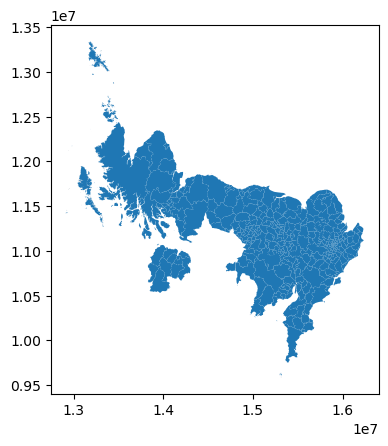

In [57]:
shapefile = shapefile.to_crs("EPSG:2234")
shapefile.plot()

In [79]:
shp = shapefile.merge(df2_map, left_on='Local authority name (2020)', right_on = 'Local authority name (2020)')
shp.head()

,OBJECTID,LAD21CD,Local authority name (2020),BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,...,Diabetes_x,Learning_disabilities_x,localR2_x,intercept_y,Asthma_y,Cancer_diagnosis_since_2003_y,Depression_y,Diabetes_y,Learning_disabilities_y,localR2_y
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((14838446.200 11687569.536, 14838487....",...,0.0,4.534840,0.640116,4.608416,-2.146336,-3.840387,0.000000,0.0,4.534840,0.640116
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((14878237.452 11656112.732, 14878476....",...,0.0,2.887723,0.610804,4.929214,0.000000,-7.422953,0.000000,0.0,2.887723,0.610804
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((14878914.414 11688075.571, 14879465....",...,0.0,6.400871,0.743875,10.130464,-5.284930,-2.742795,0.000000,0.0,6.400871,0.743875
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((14853736.592 11659048.379, 14853758....",...,0.0,3.526221,0.631277,5.267193,-2.439740,-2.372001,0.000000,0.0,3.526221,0.631277
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((14813963.822 11600694.445, 14814084....",...,0.0,2.538107,0.586066,4.349664,0.000000,-6.370157,-2.318129,0.0,2.538107,0.586066


In [80]:
shp.shape

(305, 24)

In [82]:
shp = shp.dropna(axis=0)

In [83]:
shp.shape

(296, 24)

In [67]:
df = df.dropna(axis=0)

In [84]:
df.shape

(305, 32)

In [85]:
df[~df.index.isin(shp.index)]

,Local authority name (2020),Asthma,Atrial fibrillation,Cancer diagnosis since 2003,Cardiovascular disease prevention,Chronic kidney disease,COPD,Coronary heart disease,Dementia,Depression,...,Jan 2019 to Dec 2019,Apr 2019 to Mar 2020,Jul 2019 to Jun 2020,Oct 2019 to Sep 2020,Jan 2020 to Dec 2020,Apr 2020 to Mar 2021,Jul 2020 to Jun 2021,Oct 2020 to Sep 2021,Jan_2021_to_Dec_2021,Apr 2021 to Mar 2022
13,Bassetlaw,6.463357,2.737000,3.576429,1.048286,5.927714,2.697143,3.553429,1.073929,12.381286,...,3.5,3.6,3.9,4.6,5.4,5.3,4.8,4.4,3.6,3.2
38,Buckinghamshire,6.581343,2.302030,3.427597,1.182179,3.125896,1.347000,2.955552,0.821866,11.624090,...,2.8,2.7,3.2,3.5,3.6,3.9,3.9,3.6,3.6,3.2
146,Lancaster,7.126778,2.321778,3.341000,1.201889,4.343500,2.399056,3.665889,1.072111,15.422333,...,4.5,4.6,3.9,3.8,4.5,4.4,4.8,5.1,4.9,5.1
211,Rotherham,7.319394,2.331333,3.211576,1.324818,3.987909,3.043091,3.955121,0.985667,15.063697,...,5.0,5.0,4.4,4.3,4.5,4.4,5.1,5.2,4.3,4.4
223,Selby,7.518400,2.540800,3.516000,1.238800,4.357900,2.199200,3.755600,0.776500,10.162800,...,3.3,2.7,2.6,2.8,2.8,3.2,3.2,3.7,3.4,3.2
227,Slough,5.480500,1.090643,1.711429,1.072000,2.993500,1.120643,2.534929,0.380500,8.188500,...,4.1,3.8,4.0,4.5,5.8,6.2,6.4,6.9,6.2,6.0
228,Solihull,6.496103,2.209138,3.476793,1.156241,4.047586,2.015552,3.189655,0.809448,10.902207,...,4.1,3.8,3.9,4.2,4.4,4.8,4.3,4.2,4.3,4.1
229,Somerset West and Taunton,7.082789,3.126526,4.491474,1.397579,4.520526,2.480053,3.983579,0.924737,14.181579,...,3.1,3.1,3.3,3.8,4.1,4.7,4.6,3.9,3.7,3.2
266,Teignbridge,7.431158,3.046211,4.315737,1.119053,5.466789,2.292158,3.774895,1.049368,12.103895,...,2.6,2.7,3.0,3.4,3.8,4.0,3.4,3.2,3.1,2.6
305,Woking,5.650333,1.926250,3.102750,1.026000,4.261083,1.231250,2.372000,0.859250,9.228083,...,2.1,2.4,2.8,3.1,3.7,3.8,4.3,3.8,3.7,3.3


In [86]:
df =df.drop([13,38,146,211,223,227,228,229,266,305,306,307,308,309,310,311,312,313])

In [87]:
df.shape

(287, 32)

In [90]:
df2_map.shape

(305, 8)

In [91]:
df2_map[~df2_map.index.isin(shp.index)]

,Local authority name (2020),intercept,Asthma,Cancer_diagnosis_since_2003,Depression,Diabetes,Learning_disabilities,localR2
13,Bassetlaw,5.037581,0.000000,-5.795974,0.000000,0.0,0.000000,0.586185
38,Buckinghamshire,11.013133,-3.178117,-2.608332,0.000000,0.0,5.156276,0.783314
146,Lancaster,5.064130,0.000000,-3.746823,0.000000,0.0,0.000000,0.562647
211,Rotherham,4.742021,0.000000,-7.486388,0.000000,0.0,0.000000,0.613931
223,Selby,10.389739,-4.518359,-2.555159,0.000000,0.0,6.232510,0.800147
227,Slough,6.869149,-2.896362,-2.824743,0.000000,0.0,3.569756,0.743760
228,Solihull,5.655234,0.000000,-2.959569,0.000000,0.0,0.000000,0.619657
229,Somerset West and Taunton,5.873878,0.000000,-6.926088,3.211365,0.0,0.000000,0.669379
266,Teignbridge,10.664934,-5.040921,-3.068981,0.000000,0.0,6.291548,0.734243
305,Woking,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df2_map =df2_map.drop([13,38,146,211,223,227,228,229,266,305,306,307,308,309,310,311,312,313])

ValueError: Length of values (305) does not match length of index (296)

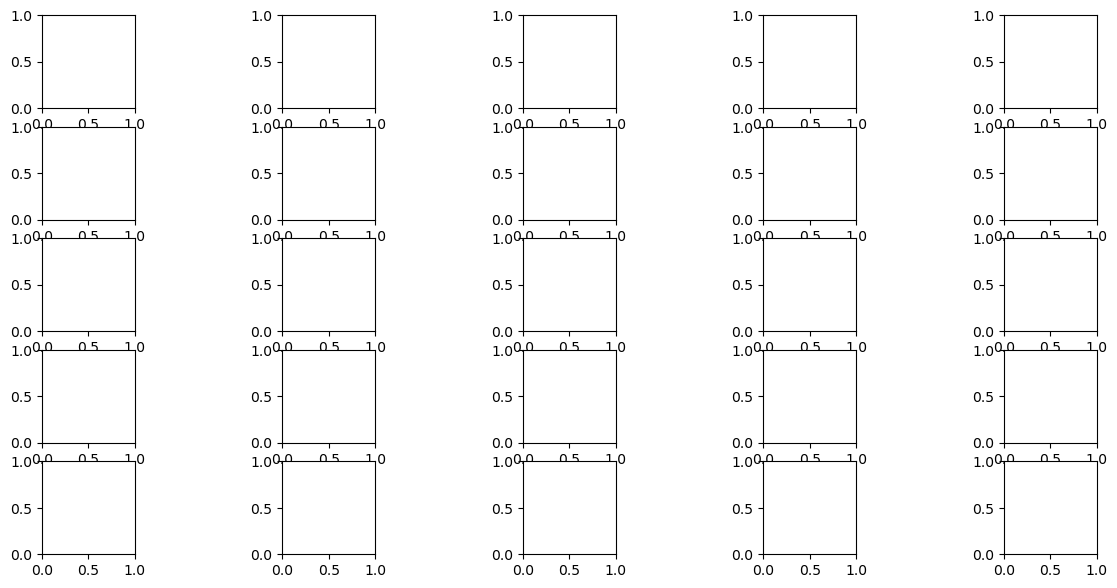

In [93]:
# First, let's create empty set of subplots with 2 rows and 3 columns
f,ax=plt.subplots(5,5,figsize=(15,7), subplot_kw=dict(aspect='equal'))
# Flatten them
ax = ax.flatten()
# Define the title of our plots
title = ["Asthma","Cancer Diagnosis since 2003","Depression","Diabetes",
          "Learning Disabilities", "localR2"]

# Here, we are creating loop for our parameter estimates 
for i,row in enumerate(filtered_estimates90.T):
    # We want to plot all the non-significant estimates in grey
    shp = shp.assign(toplot=filtered_estimates90.T[i])
    (shp.query('toplot==0')
     .sort_values('toplot')
     .plot(color='grey',ax=ax[i],alpha=.2))
    # and assign colours only to the significant estimates
    (shp.query('toplot!=0')
     .sort_values('toplot')
     .plot('toplot',
           cmap='viridis',
           ax=ax[i],
           legend=False))
    
    ax[i].set_title(titles[1], fontsize=16)
    
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
 
# For the last one, local R2, we can just map all of them regarding the significance

(shp.assign(r2=results.localR2)
 .sort_values('r2')
 .plot('r2',
       ax=ax[-1],
       legend=False,
       cmap='viridis'))
    
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
    
ax[-1].set_title('Local R2', fontsize=16)

plt.show()